# Marlow Case - TripleTen DS Sprint 7 Project: 
# Developing a Phone Plan Classification Model #

# Table of Contents #
<a id='contents'></a>

- [1. Introduction](#introduction)
    - [Criteria](#criteria)
- [2. Data Exploration](#exploration)
- [3. Exploratory Data Analysis (EDA)](#EDA)
    - [Distributions of Features](#EDA)
    - [Distribution of Target](#EDA_target)
- [4. Development and Tuning of Different Models](#model_tuning)
    - [Separating the Dataset](#separation)
    - [Decision Tree](#tree)
    - [Random Forest](#forest)
    - [Logistic Regression](#logic)
- [5. Final Model Selection and Evaluation](#final)
    - [Final Model Evaluation](#eval)
- [6. Conclusion](#conclusion)

## Introduction ##
<a id='introduction'></a>
________________________________________________________________________________________________________________________________

This project aims to develop a binary classification model for the mobile carrier Megaline. The model aims to recommend one of the two phone plans: Smart or Ultra. The model will be developed by analyzing the existing subscriber's behavior data provided to us by the company (see sprint 3 project).

### Criteria as Requested by Megaline ###
<a id='criteria'></a>
 - We will split the source datga into train, validation, and test sets.
 - We will investigate more than one model variation.
 - Our final model needs to have an **_accuracy of 75% or above_**.

In [1]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [2]:
# Data pre-processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from itertools import product

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import GridSearchCV

# For evaluation
from sklearn.metrics import accuracy_score

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

## Data Exploration ##
<a id='exploration'></a>
________________________________________________________________________________________________________________________________

Megaline has provided us with the subscriber behavior data. As informed by the company, they have performed the data preporocessing steps; therefore, we wil perform a general exploration of the cleaned dataset. 

In [3]:
# Load the dataset
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv(r'C:\Users\marlo\OneDrive\Desktop\Python_Work\Tripleten_Lessons\Sprint_7_Project\users_behavior.csv')

In [4]:
# Have a look at the data
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


The data contains 3,214 rows of data with 5 columns of monthly data relating to the subscriber.

**Description of the Data:**
 - `calls`: The number of calls
 - `minutes`: Total call duration in minutes
 - `messages`: Number of text messages
 - `mb_used`: Internet traffic used in MB
 - `is_ultra`: Plan for the current month (Ultra - 1, Smart - 0)

In [6]:
# Check for duplicates
data.duplicated().sum()

0

In [7]:
# Check if there are any missing values
data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [8]:
# check the data types
data.dtypes

calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object

In [9]:
np.sort(data['calls'].unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 136., 137., 138., 140., 141., 142., 143., 144.,
       145., 146., 148., 150., 151., 152., 153., 15

In [10]:
data['calls'] = data['calls'].astype('int')

In [11]:
data.dtypes

calls         int32
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object

In [12]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40,311.90,83.0,19915.42,0
1,85,516.75,56.0,22696.96,0
2,77,467.66,86.0,21060.45,0
3,106,745.53,81.0,8437.39,1
4,66,418.74,1.0,14502.75,0


In [13]:
np.sort(data['messages'].unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 148., 149., 150., 15

In [14]:
data['messages'] = data['messages'].astype('int')

In [15]:
data.dtypes
### Data types are now correct. They were fine before, personal preference to have ints, since you can't have fraction
  # of calls and messages and there were no values containing decimals in either column. 

calls         int32
minutes     float64
messages      int32
mb_used     float64
is_ultra      int64
dtype: object

In [16]:
# Check descriptive data
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


There are no duplicate or missing values. The data types have been corrected (converted calls and messages to int) and there are no anomalies. 

The datasets contain four features and one target variable. These will be used to develop the model.

 - Features: `calls`, `minutes`, `messages`, and `mb_used`.
 - Target: `is_ultra`
 
 [Back to Contents](#contents)

## Exploratory Data Analysis (EDA) ##
<a id='EDA'></a>

### Distributions of the Features ###

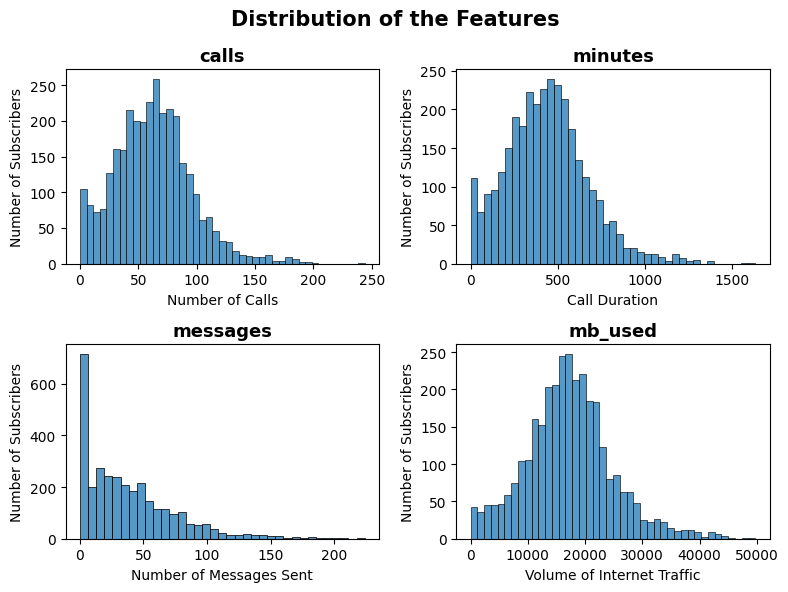

In [17]:
# Plot histograms for the features data to visualize the distributions

# Define the feature names and their respective titles and labels; setting up for loop
features = [
    ('calls', 'Number of Calls', 'Number of Subscribers'),
    ('minutes', 'Call Duration', 'Number of Subscribers'),
    ('messages', 'Number of Messages Sent', 'Number of Subscribers'),
    ('mb_used', 'Volume of Internet Traffic', 'Number of Subscribers')
]

fig, axs = plt.subplots(2, 2, figsize = (8, 6))
fig.suptitle('Distribution of the Features', fontsize = 15, fontweight = 'bold')
axs = axs.flatten()

# loop through features
for i, (feature, xlabel, ylabel) in enumerate(features):
    sns.histplot(x = data[feature], ax=axs[i])
    axs[i].set_title(feature, fontsize = 13, fontweight = 'bold')
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel(ylabel)
    
plt.tight_layout()
plt.show()

Three out of the four distributions appear relatively normal, with the only one not appearing that way is `messages`, this is due to the large number of outliers present in the data. However, the distributions are close to normal.  

### Distribution of the Target Class ###
<a id='EDA_target'></a>

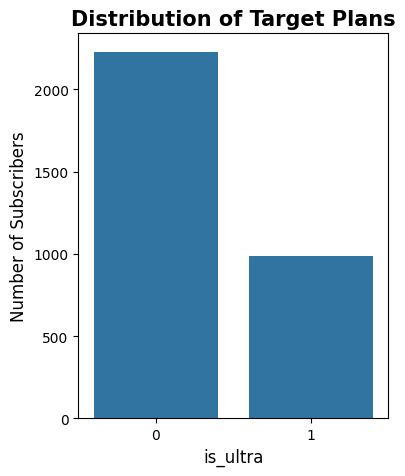

In [18]:
# Let's visualize the distribution of target plans
plt.figure(figsize = (4,5))

sns.countplot(x = 'is_ultra', data = data) #width not working, don't know why. 

plt.title('Distribution of Target Plans', fontsize = 15, fontweight = 'bold')
plt.xlabel('is_ultra', fontsize = 12)
plt.ylabel('Number of Subscribers', fontsize = 12)

plt.show()

In [19]:
# Look at proportion of each Plan
data['is_ultra'].value_counts(normalize = True)

is_ultra
0    0.693528
1    0.306472
Name: proportion, dtype: float64

The distribtution of the target plans/classes is imbalanced; with the ratio of the Smart plan (`0 class`) to the Ultra plan (`1 class`) being 7:3. The proportion of the minority class is 30% and can be considered as a mild degree of imbalance; therefore, no further action will be taken to address this imbalance. However, if the model does not perform well, we could come back and take an additional deeper look into this. 

[Back to Contents](#contents)

## Development and Tuning of Different Models ##
<a id='model_tuning'></a>
________________________________________________________________________________________________________________________________

The following function will be used to automate visual tasks in this section

In [20]:
def sns_lineplot(data, x, y, title, figsize, hue=None):
    """
    This function plots a line graph to visualize the model training result.
    
    Parameters:
    data (DataFrame): the dataFrame to be used to select variables to graph
    x (string): column name from data to be used as the x variable
    y (string): column name from data to be used as the y variable
    title (string): string that represents the title of the figure
    figsize (tuple): tuple to determine the size of the figure (x,y)
    hue (string): column name to categorize and colorize the data
    """
    
    sns.set_style('whitegrid')
    plt.figure(figsize = figsize)
    
    if hue is None:
        sns.lineplot(data = data, x = x, y = y, errorbar = None, marker = 'o', linestlye = '-')
    else:
        sns.lineplot(data = data, x = x, y = y, hue = hue, errorbar = None, markers = True, marker = 'o', linestyle = '-')
        
    plt.title(title, fontsize = 15, fontweight = 'bold')
    plt.xlabel(x, fontsize = 12, fontweight = 'bold')
    plt.ylabel(y, fontsize = 12, fontweight = 'bold')
    plt.legend(title = hue, loc = 'upper left', bbox_to_anchor = (1,1))
    
    plt.show()

________________________________________________________________________________________________________________________________

### Separating the Datasets into Training, Validation, and Tests ###
<a id='separation'></a>

The dataset will be divided in a ratio of _60:20:20_ for _training:validation:test_ respectively.

In [21]:
# Set up the feature and target variables; features, target
features = data.drop(columns=['is_ultra'])
target = data['is_ultra']

# Check shape
features.shape, target.shape

((3214, 4), (3214,))

In [22]:
# Split the dataset a ratio of 80:20 where the 20% is the Test set
feature_train, feature_test, target_train, target_test = train_test_split(features, 
                                                                          target, 
                                                                          test_size=0.2, 
                                                                          random_state = 12345)

# Split the dataset a ratio of 75:25 where the 25% is the Validation set
feature_train, feature_val, target_train, target_val = train_test_split(feature_train, 
                                                                        target_train, 
                                                                        test_size=0.25, 
                                                                        random_state = 12345)

In [23]:
# Check the percentages of each variable in all three sets
datasets = [
    ("feature_train", feature_train, features),
    ("target_train", target_train, target),
    ("feature_test", feature_test, features),
    ("target_test", target_test, target),
    ("feature_val", feature_val, features),
    ("target_val", target_val, target)
]

output = ""

for name, dataset, class_ in datasets:
    percentage = f"{dataset.shape[0] / class_.shape[0]:.0%}"
    output += f"Percentage of {name}: {percentage}\n"
    if "target" in name:
        output += "\n"

print(output)

print("Percentages look correct.")

Percentage of feature_train: 60%
Percentage of target_train: 60%

Percentage of feature_test: 20%
Percentage of target_test: 20%

Percentage of feature_val: 20%
Percentage of target_val: 20%


Percentages look correct.


In [24]:
# Observe the shape
shape_output = ""

for name, dataset, class_ in datasets:
    shape_set = f"{dataset.shape}"
    shape_output += f"Shape of {name}: {shape_set}\n"
    if "target" in name:
        shape_output += "\n"
        
print(shape_output)

Shape of feature_train: (1928, 4)
Shape of target_train: (1928,)

Shape of feature_test: (643, 4)
Shape of target_test: (643,)

Shape of feature_val: (643, 4)
Shape of target_val: (643,)




The dataset has successfully been split into the ratio of 60:20:20 for training:validation:test.

Let's now start to develop different models and tune the hyperparameters to find the best model. We will work on developing three models: `decision tree`, `random forest`, and `logistic regression`.

[Back to Contents](#contents)

### Decision Tree ###
<a id='tree'></a>

We will be using a loop to develop the model, as well as collect all appropriate information. 

Information to be collected is as follows:
- A list that will contain all tested model parameters: `model_param_list`
- A list that will contain all accuracy scores for their corresponding model parameters: `accuracy_list`
- A dictionary that contains the most accurate model data which includes the parameters for that model and its accuracy score: `best_model_data`.
- A dataframe that concatenates the above information to better contain all info in one place. Also to help perform any filtering for analysis: `loop_result_df`.

We will then look at some distributions over that dataframe. The above objects are defined below.

We have chosen the parameters carefully based upon the DecisionTreeClassifier documentation: [Link to Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

**Parameters in our Parameter Grid:**
 - `max_depth`: Controls the maximum depth of the tree. This can help mnodel more complex relationships but are usually prone to overfitting. We are coverring a wide range of depths to observe any patterns when charted. We will include some additional parameters to adjust for this overfitting.
 - `min_samples_split`: Specifies the minimum number of samples required to split an internal node. This is helpful for the model to prevent learning overly specific patterns.
 - `min_samples_leaf`: Sets the minimum number of samples requred to be at a leaf node. This helps the model become more robust to variations. Should allow us to increase accuracy at the cost of run-time.


**_Computer Specifications_**

*I am a proud owner of a very powerful computer, hence my choice in including additional hyperparameters for a slightly longer run-time. I felt the below parameter values sufficed the objective of this project and therefore did not choose larger numbers. As we will see from the distributions later, I conclude that larger values are not relevant for our purposes anyway.*

*appx run time: 1min 30sec - 2min*

In [45]:
model_param_list = []
accuracy_list = []
best_model = {}
best_model_data = {'hyperparameters': None, 'accuracy': 0}

param_grid = {
    'max_depth': [x for x in range(1,21)],
    'min_samples_split': [x for x in range(2,41)],
    'min_samples_leaf': [x for x in range(1,16)],
    'criterion': ['gini', 'entropy']
}

In [46]:
# Could potentially create function
keys, values = zip(*param_grid.items())

# Establish each key value pair possible from parameter grid and 
# loop through these combinations to develop model
for param_value in product(*values):
    model_params = dict(zip(keys, param_value))

    model = DecisionTreeClassifier(**model_params, random_state = 12345)

    model.fit(feature_train, target_train) #train current model
    accuracy = model.score(feature_val, target_val) #obtain accuracy for current model

    # Store each parameter list and accuracy score for the current model
    model_param_list.append(model_params)
    accuracy_list.append(accuracy)

    # Save best model data found
    if accuracy > best_model_data['accuracy']:
        best_model = model
        best_model_data['hyperparameters'] = model_params
        best_model_data['accuracy'] = accuracy

loop_result_df = pd.DataFrame({'params': model_param_list, 'accuracy': accuracy_list}) #currently contains dictionary as value of params column

# unpack the dictionary in 'params'
loop_result_df = pd.concat([pd.json_normalize(loop_result_df['params']), loop_result_df['accuracy']], axis = 1)

print("Best Model Parameters:", best_model_data['hyperparameters'])
print("Best Accuracy", best_model_data['accuracy'])

Best Model Parameters: {'max_depth': 15, 'min_samples_split': 21, 'min_samples_leaf': 6, 'criterion': 'entropy'}
Best Accuracy 0.7993779160186625


In [47]:
# Top 10 models
loop_result_df.sort_values(by = 'accuracy', ascending = False).reset_index(drop=True).head(10)

,max_depth,min_samples_split,min_samples_leaf,criterion,accuracy
0,15,21,6,entropy,0.799378
1,10,18,8,gini,0.797823
2,10,22,8,gini,0.797823
3,20,21,6,entropy,0.797823
4,11,23,8,gini,0.797823
5,11,22,8,gini,0.797823
6,10,20,8,gini,0.797823
7,11,21,8,gini,0.797823
8,10,21,8,gini,0.797823
9,11,17,8,gini,0.797823


In [48]:
# Show best model
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=6,
                       min_samples_split=21, random_state=12345)

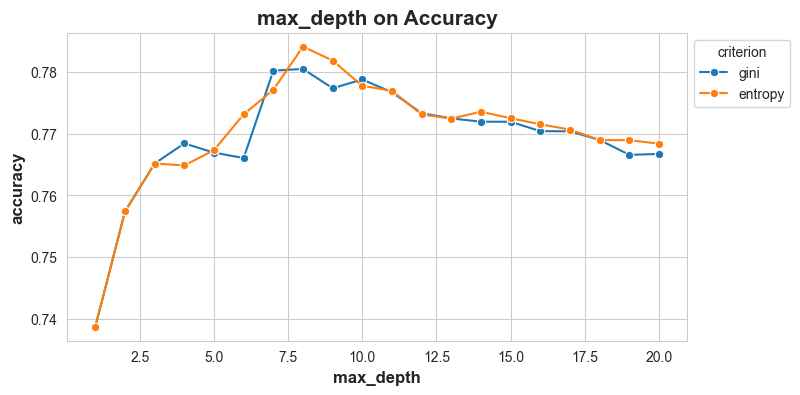

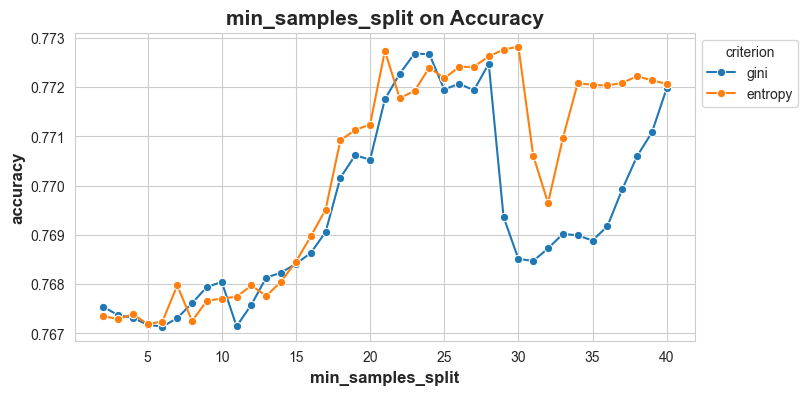

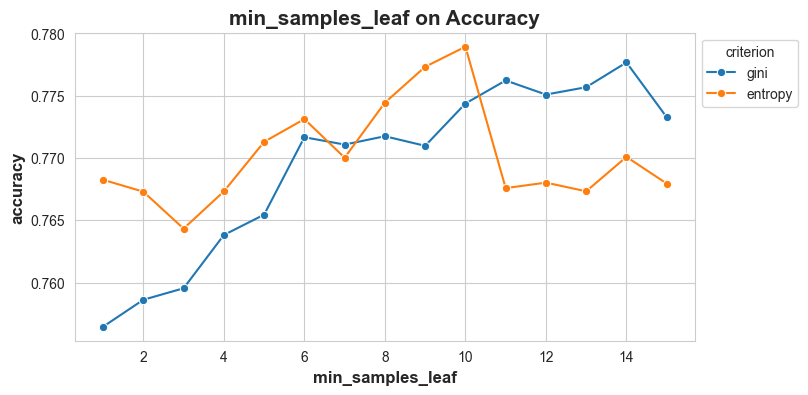

In [49]:
# Plot the distributions of test scores versus parameters; had trouble with subplot
for column in loop_result_df.columns:
    if column != 'accuracy' and column != 'criterion':
        sns_lineplot(data = loop_result_df, 
                     x = column, y = 'accuracy', 
                     title = f'{column} on Accuracy',
                     figsize = (8, 4),
                     hue = 'criterion')
        

I find the results of the test very interesting. Looking at the three charts we see a mix of `gini` and `entropy` criterion types over-performning and under-performing when compared to each other. Overall however, models with `entropy` criterion have better accuracies than those of `gini`, which actually goes against my expectations. I spent a significant time adjusting the parameter values to see if this was a fluke case, as most of the top performing models are `gini`, but the top performing model was `entropy`. 
More specifically, we can see a decrease in accuracy after a `max_depth` of around 8. `min_samples_split` appears to have a significant drop after 28, for `gini` models and 30 for `entropy` models. The `min_samples_leaf` on accuracy tends to show positive growth for `gini` models up until 14, whereas `entropy` models decline after `min_samples_leaf` size of 10. 

In summary our best model parameters for the Decision Tree Model are below:
 - `Max Depth`: **15**
 - `Min Samples Split`: **21**
 - `Min Samples Leaf`: **6**
 - `Criterion`: **entropy**
 - `Resulting Accuracy Score`: **79.94%**

[Back to Contents](#contents)

### Random Forest ###
<a id='forest'></a>

Through a lot of work, our Decision Tree was decently accurate, and satisfied the requirements of the project, but let's try some more models and see if we can increase the accuracy further. We will next develop a _Random Forest_ model. This model uses numerous decision trees to generate a more accurate prediction. 

[Link to Random Forest Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [30]:
# Initialize lists, dicts, and parameters
model_param_list_forest = []
accuracy_list_forest = []
best_model_forest = {}
best_model_data_forest = {'hyperparameters': None, 'accuracy': 0}

# start broad, then narrow down
param_grid_forest = {
    'n_estimators': [x for x in range(20, 100, 10)],
    'max_depth': [x for x in range(10, 26, 2)],
    'min_samples_split': [x for x in range(2, 6)],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

In [31]:
# Re-use loop with slight modifications; appx run  time ~ 4 mins
keys, values = zip(*param_grid_forest.items())

for param_value in product(*values):
    model_params = dict(zip(keys, param_value))

    model = RandomForestClassifier(**model_params, random_state = 12345)

    model.fit(feature_train, target_train) #train current model
    acc_f = model.score(feature_val, target_val) #obtain accuracy for current model

    # Store each parameter list and accuracy score for the current model
    model_param_list_forest.append(model_params)
    accuracy_list_forest.append(acc_f)

    # Save best model data found
    if acc_f > best_model_data_forest['accuracy']:
        best_model_forest = model
        best_model_data_forest['hyperparameters'] = model_params
        best_model_data_forest['accuracy'] = acc_f

forest_result_df = pd.DataFrame({'params': model_param_list_forest, 'accuracy': accuracy_list_forest}) #currently contains dictionary as value of params column

# unpack the dictionary in 'params'
forest_result_df = pd.concat([pd.json_normalize(forest_result_df['params']), forest_result_df['accuracy']], axis = 1)

print("Best Model Parameters:", best_model_data_forest['hyperparameters'])
print("Best Accuracy", best_model_data_forest['accuracy'])

Best Model Parameters: {'n_estimators': 50, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'entropy'}
Best Accuracy 0.8055987558320373


In [32]:
forest_result_df.sort_values(by = 'accuracy', ascending = False).reset_index(drop=True).head(20)

,n_estimators,max_depth,min_samples_split,min_samples_leaf,criterion,accuracy
0,50,12,3,2,entropy,0.805599
1,80,20,2,1,entropy,0.805599
2,50,12,2,2,entropy,0.805599
3,70,22,2,1,entropy,0.805599
4,70,20,2,1,entropy,0.805599
5,50,12,4,2,entropy,0.805599
6,90,22,2,1,entropy,0.804044
7,40,16,2,1,entropy,0.804044
8,20,16,3,1,entropy,0.804044
9,90,12,3,2,entropy,0.804044


In [33]:
# Show best model
best_model_forest

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=2,
                       n_estimators=50, random_state=12345)

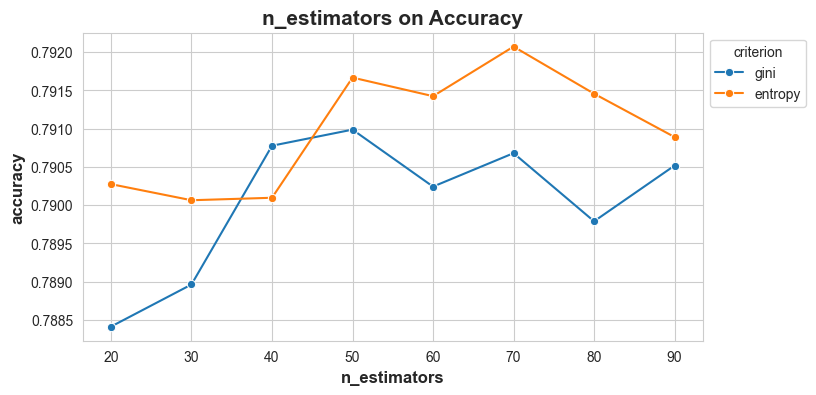

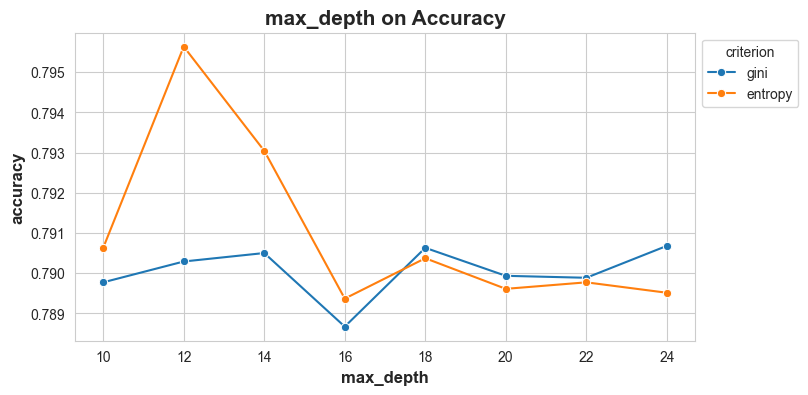

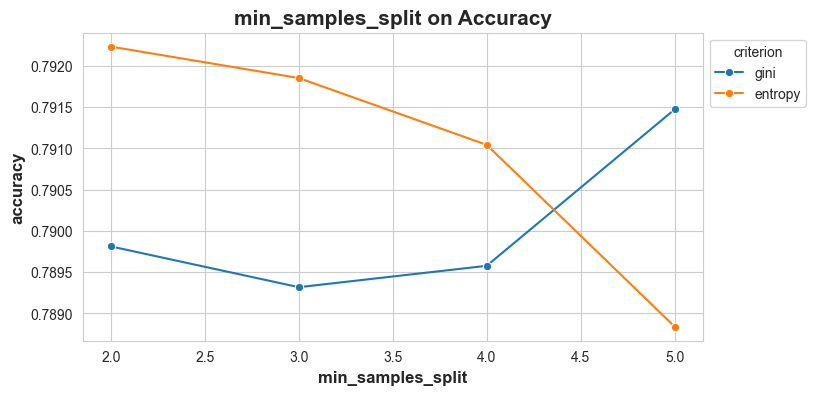

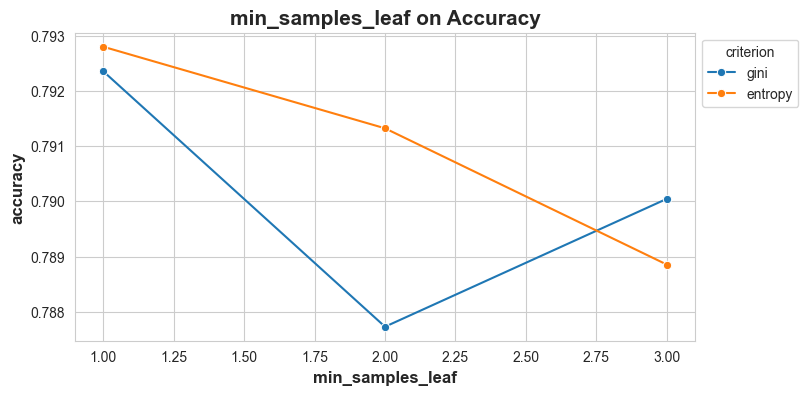

In [34]:
# Plot the distributions of test scores versus parameters; 
for column in forest_result_df.columns:
    if column != 'accuracy' and column != 'criterion':
        sns_lineplot(data = forest_result_df, 
                     x = column, y = 'accuracy', 
                     title = f'{column} on Accuracy',
                     figsize = (8, 4),
                     hue = 'criterion')

Looking at the distributions, the `entropy` models are the clear winners, providing significantly higher accuracy overall than the `gini` models. We can that both model types have a peak in accuracy around 50 estimators, although `entropy` peaks again at 70, it's not a suprise that the best model contains 50 estimators. As for `max_depth`, `gini` models are almost uniform in their accuracy across the entire measured scale, whereas `entropy` models have a significant peak at 12, and decline considerably down to the level of the `gini` models post 12. The `min_samples_split` and `min_samples_leaf` parameters showed their greatest results at low numbers, and therefore their ranges are small. We can see the advantage `entropy` models provide from these two distributions at this scaling.  

In summary our best model parameters for the RandomForest Model are below:
 - `Max Depth`: **12**
 - `Min Samples Split`: **2**
 - `Min Samples Leaf`: **2**
 - `Criterion`: **entropy**
 - `Resulting Accuracy Score`: **80.56%**

[Back to Contents](#contents)

### Logistic Regression ###
<a id='logic'></a>

Our last model to review will be the Logistic Regression model. I have chosen this moodel to avoid the decision tree based regression models due to their similarities with the models already studied. The decision also pertained to the need to stay close to classification models.The Logistic Regression model also fits nicely into binary classification target data, which is exactly what we have. 

[Link to Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

According to the documentation, we can use the `C` parameter to adjust the strength of the regularization. This can help prevent overfitting by penalizing large coefficients in the model. Generally, if `C` is large,  the penalty is small, allowing the mode to fit the training data more closely; consequently, this can lead to a model that doesn't generalize as well than if `C` is small. So we will use a wide range of `C` values to see which Logistic Regression model produces the greatest accuracy. 

Also based on the documentation, we will not be comparing `criterion` types for this model. Instead, we will compare `solvers`. The two we will compare are `liblinear` and `newton-cholesky` since they are great solvers for binary classifications. 

One more point to make before beginning; feature scaling is needed here since the features have different very different scales. With `calls` and `messages` ranging from 0 to 244, and `mb_used` ranging from 0 to 42000+. We will utilize the `StandardScaler` from `sklearn.preprocessing`.

In [35]:
# Apply the scaling
scaler = StandardScaler()
feature_train_scal = scaler.fit_transform(feature_train)
feature_val_scal = scaler.fit_transform(feature_val)
feature_test_scal = scaler.fit_transform(feature_test)

In [40]:
# Initialize lists, dicts, and parameters
model_param_list_lr = []
accuracy_list_lr = []
best_model_lr = {}
best_model_data_lr = {'hyperparameters': None, 'accuracy': 0}

# Going for a wide range of C values; start broad then narrow down
param_grid_lr = {
    'solver': ['liblinear', 'newton-cholesky'],
    #'C': [0.001, 0.01, 0.1, 1, 10, 100]
    'C': [x for x in np.arange(0.0001, 0.03, 0.00005)]
    #'C': [y for y in np.arange(0.001, 0.01, 0.001)] + [x for x in np.arange(0.01, 100, .01)]
}

In [41]:
# Apply loop method - appx run time ~~ instantaneous
keys, values = zip(*param_grid_lr.items())

for param_value in product(*values):
    model_params = dict(zip(keys, param_value))

    model = LogisticRegression(**model_params, random_state = 12345, max_iter = 10000)

    model.fit(feature_train_scal, target_train) #train current model
    acc_lr = model.score(feature_val_scal, target_val) #obtain accuracy for current model

    # Store each parameter list and accuracy score for the current model
    model_param_list_lr.append(model_params)
    accuracy_list_lr.append(acc_lr)

    # Save best model data found
    if acc_lr > best_model_data_lr['accuracy']:
        best_model_lr = model
        best_model_data_lr['hyperparameters'] = model_params
        best_model_data_lr['accuracy'] = acc_lr


lr_result_df = pd.DataFrame({'params': model_param_list_lr, 'accuracy': accuracy_list_lr}) #currently contains dictionary as value of params column

# unpack the dictionary in 'params'
lr_result_df = pd.concat([pd.json_normalize(lr_result_df['params']), lr_result_df['accuracy']], axis = 1)

print("Best Model Parameters:", best_model_data_lr['hyperparameters'])
print("Best Accuracy", best_model_data_lr['accuracy'])

Best Model Parameters: {'solver': 'newton-cholesky', 'C': 0.0063500000000000015}
Best Accuracy 0.7356143079315708


In [42]:
lr_result_df.sort_values(by = 'accuracy', ascending = False).reset_index(drop = True).head(10)

,solver,C,accuracy
0,newton-cholesky,0.00660,0.735614
1,newton-cholesky,0.00635,0.735614
2,newton-cholesky,0.00640,0.735614
3,newton-cholesky,0.00645,0.735614
4,newton-cholesky,0.00650,0.735614
5,newton-cholesky,0.00655,0.735614
6,newton-cholesky,0.00665,0.735614
7,newton-cholesky,0.00670,0.735614
8,newton-cholesky,0.01085,0.734059
9,newton-cholesky,0.00610,0.734059


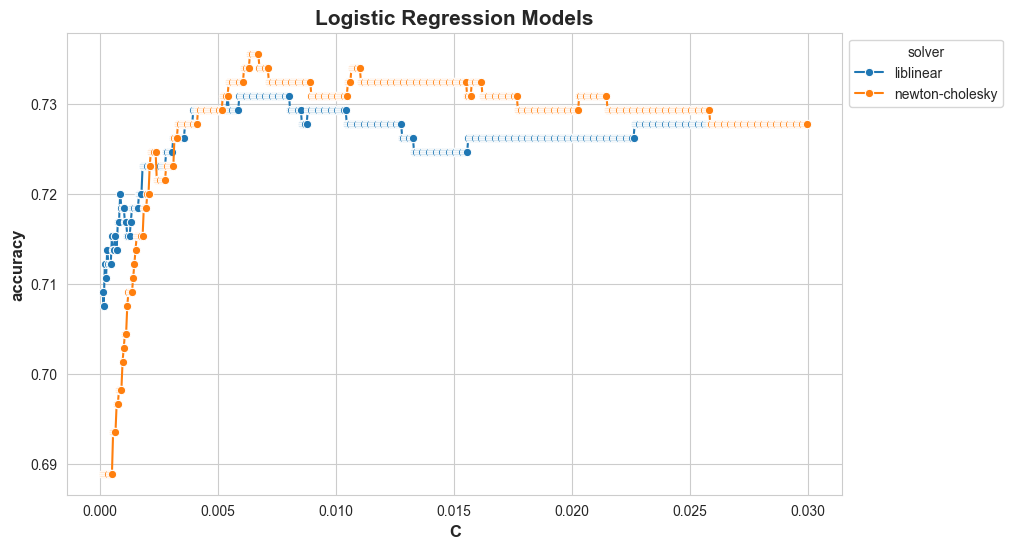

In [43]:
# Plot line plot
sns_lineplot(data = lr_result_df,
             x = 'C', y = 'accuracy',
             hue = 'solver',
             figsize = (10,6),
             title = "Logistic Regression Models")

We can observe some interesting back an forth. As `C` is smaller, the `liblinear` models produce higher accuracy until somewhere around `C = 0.01` the `newton-cholesky` models provide more accurate predictions. At around `C = 0.025` mark, the two models converge. No surprise that our best Logistic Regression model was `newton-cholesky` based on the top 10 models. 

In summary our best model parameters for the Logistic Regression model are below:
 - `C`: **0.0064**
 - `Max Iterations`: **10,000**
 - `Solver`: **newton-cheloskey**
 - `Resulting Accuracy Score`: **73.56%**

This model does not meet Megaline's accuracy requirements and therefore will not be in our consideration for the final model. 

[Back to Contents](#contents)

## Final Model Selection and Evaluation ##
<a id='final'></a>

In [67]:
# Refine their dictionaries via model labels. 
best_model_data['model_type'] = 'Decision Tree'
best_model_data_forest['model_type'] = 'Random Forest'
best_model_data_lr['model_type'] = 'Logistic Regression'

# Create DataFrames
model_dicts = [best_model_data, best_model_data_forest, best_model_data_lr]
model_dfs = []

for dict in model_dicts:
    dict = pd.DataFrame.from_dict([dict])
    model_dfs.append(dict)

# Combine their data into one DataFrame
all_model_data = pd.concat(model_dfs, ignore_index = True)
all_model_data = all_model_data[['model_type', 'hyperparameters', 'accuracy']]
all_model_data.columns = [col.replace('_', ' ').title() for col in all_model_data.columns]
all_model_data

,Model Type,Hyperparameters,Accuracy
0,Decision Tree,"{'max_depth': 15, 'min_samples_split': 21, 'mi...",0.799378
1,Random Forest,"{'n_estimators': 50, 'max_depth': 12, 'min_sam...",0.805599
2,Logistic Regression,"{'solver': 'newton-cholesky', 'C': 0.006350000...",0.735614


The accuracies of the `Decision Tree` and `Random Forest` models are quite close, the the logistic regression model being less accurate by a decent margin than our top 2 performing models. Therefore, based on this validation data, **we will choose the `Random Forest` as the final model**. 

[Back to Contents](#contents)

### 5.1 Evaluating the Performance of the Final Model with the Test Set ###
<a id='eval'></a>

In [74]:
# Assign as final model
final_model = best_model_forest

# Perform test
final_preds = final_model.predict(feature_test)
rf_acc = accuracy_score(target_test, final_preds)
print(f"The accuracy of our best Random Forest model on the test set is: {rf_acc:.2%}.")

The accuracy of our best Random Forest model on the test set is: 79.63%.


**The accuracy of our Random Forest Classifier model is 79.63% which meets the expectations of Megaline.**

[Back to Contents](#contents)

## General Conclustion
<a id='conclusion'></a>

**Data Exploration**

At this stage, we verified the dataset to be in good condition, only converting two columns to integers for aesthetics, no other practical changes were necessary. Megaline has stated that the data would be ready to develop a binary classification model, which turned out to be true. 

**Exploratory Data Analysis**

The distributions of the feature data is not perfectly normal, but close. There are a large number of outliers in the `message` data. Therefore, we decided that we would use feature scaling before certain models were being trained, namely the `logistic regression model`. The standardization helps preserve the distributions. 

**Development and Tuning of Different Models and Selection of Final Model**

The dataset was split into a ratio of 60:20:20 for training:validation:test, respectively. We trained a total of three machine learning models: the `Decision Tree`, the `Random Forest` and the `Logist Regression` models. The `Random Forest` model was our best performing model, although the `Decision Tree` model was close. Therefore, for the final model to train the test data, the `Random Forest` model was chosen. 

**Final Model Performance**

After testing our best `Random Forest` model with the test set, we achieved an accuracy score of **79.63%**, which meets Megaline's expectations.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You did an amazing job! Absolutely everything in your work was done at a truly professional level. I was very impressed with your work. I will be very interested to see the next projects you perform:)

</div>